(844, 16)


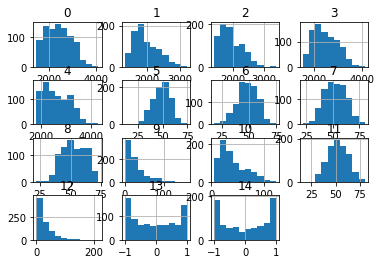

neg_mean_absolute_error Linear Regression: -59.4319370775287
[-59.35355317 -52.4463415  -57.50337177 -68.28597319 -59.02009177
 -69.11289707 -64.8925192  -50.5304353  -59.89117948 -53.28300833]
neg_mean_absolute_error Ridge Regression: -60.34335086070389
Standard Deviation 6.697382302135017
[-59.86392881 -53.38652392 -57.00773331 -67.97208574 -62.12279428
 -70.37264035 -68.5693379  -51.17291017 -61.24056532 -51.7249888 ]
neg_mean_absolute_error KNN Regression: -94.83830012307953
[-112.13986928  -90.11016043 -110.16470588 -102.76568627  -79.4781746
 -112.53571429  -93.20634921  -85.41269841  -75.55654762  -87.01309524]
neg_mean_absolute_error Single MLP: -56.41049562794173
[-59.14641278 -52.22736261 -54.34005378 -53.70041257 -62.02244076
 -67.96718106 -49.79854756 -50.45858072 -60.29261826 -54.15134617]


In [ ]:
# Libraries for the Regressors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from scipy.io import loadmat

# spliting the test data manually
from sklearn.model_selection import train_test_split
# for linear regression and Ridge Regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# for K nearest neighbours
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
# For cross validation
from sklearn.model_selection import cross_val_score
# for Multilayer Perceptron Perceptron
from sklearn.neural_network import MLPRegressor
import time

start = time.time()
mat = loadmat("powerTrainData.mat")

in_train = mat['powerTrainInput']
out_train = mat['powerTrainOutput']
datatest = mat['powerTestInput']

i = np.transpose(in_train)
o = np.transpose(out_train)
d = np.transpose(datatest)

di = pd.DataFrame(i)
do = pd.DataFrame(o)
dd = pd.DataFrame(d)

data = np.append(i,o, axis=1)
t_data = pd.DataFrame(data)
print (np.shape(t_data))
#Univariant data Visualization
di.hist()
plt.show()

#do.hist()
# plt.show()

# Scattered plot for multivariate data visualization
# sns.pairplot(di)
# plt.show()
# sns.distplot(do)
# plt.show()

train_set,test_set=train_test_split(t_data,test_size=0.2)
valid_di = test_set.iloc[:,:-1].values
train_di = train_set.iloc[:,:-1].values
valid_do = test_set.iloc[:,-1].values
train_do = train_set.iloc[:,-1].values

# print(datatest)
datatest.shape

# Create Linear Regression Object
regr = linear_model.LinearRegression()

# Training using training data
model = regr.fit(train_di, train_do)

# Making predictions using Test Sets
train_d_predict = regr.predict(valid_di)

# Data Visualisation
# sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False)

# sns.lmplot(data= di[1],x="x",y="y",fit_reg=regr,hue='Input Data')
# plt.show()
# The coefficients
# print('Linear Coefficients: \n', regr.coef_)
scores_lp = cross_val_score(regr, di, do, scoring = 'neg_mean_absolute_error', cv = 10)
print("neg_mean_absolute_error Linear Regression:", scores_lp.mean())
print(scores_lp)


# Ridge Regression


n_alphas = 10
alphas = np.logspace(-10, -2, n_alphas)

reg = linear_model.Ridge(fit_intercept=False)
parameters_reg = {'alpha':alphas}
clf_reg = GridSearchCV(reg, parameters_reg, cv=10)
clf_reg.fit(di,do)


scores_rr = cross_val_score(clf_reg, di, do, scoring = 'neg_mean_absolute_error', cv = 10)
print("neg_mean_absolute_error Ridge Regression:", scores_rr.mean())
print("Standard Deviation", scores_rr.std())
print(scores_rr.T)


# K Nearest Neighbours


k = np.linspace(1,30,30)

knn =  KNeighborsRegressor()
parameters_knn = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12]}
knn_gs = GridSearchCV(knn, parameters_knn, cv=10)
knn_gs.fit(di,do)
scores_knn = cross_val_score(knn_gs, di, do, scoring = 'neg_mean_absolute_error', cv = 10)
print("neg_mean_absolute_error KNN Regression:" ,scores_knn.mean())
print(scores_knn)


# Standard Multi Layered Perceptron

mlp = MLPRegressor(hidden_layer_sizes=(100), solver= 'lbfgs' ,max_iter=100000)
mlp.fit(train_di, train_do)
scores_mlp = cross_val_score(mlp, di, out_train[0], scoring = 'neg_mean_absolute_error', cv = 10)
print("neg_mean_absolute_error Single MLP:" ,scores_mlp.mean())
print(scores_mlp)
# print(mlp.fit(train_di, train_do))

#Predicting Output
mlp_predict = mlp.predict(valid_di)
# print(mlp_predict)


# # Committee of 10 MLPs

layers_mlp = [(100,),(200,),(300,),(400,),(500,),(600,),(700,),(800,),(900,),(1000,)]
N_mlp = 10
mlp_values = []
mlp_scores = []
for i in range(10):
    mlp_loop = MLPRegressor(hidden_layer_sizes = layers_mlp[i], solver = 'lbfgs', max_iter =1000)
    mlp_loop.fit(train_di,train_do)
    cross_val = cross_val_score(mlp_loop, di, out_train[0], scoring = 'neg_mean_absolute_error', cv = 10)
    mlp_scores.append(cross_val.mean())

mean_scores = sum(mlp_scores)/float(len(mlp_scores))
print("neg_mean_absolute_error Multiple MLPs:" , mean_scores )
 
    

# # for i in range(10):
#     # print (layers_mlp[i])

# mlp_scores = []
# for i in range(N_mlp):
#     mlp_loop = MLPRegressor(hidden_layer_sizes= layers_mlp[i], solver='lbfgs', max_iter='10000')
#     mlp_loop.fit(train_di, out_train)
#     y_predict = mlp_loop.predict(valid_di)
#     mlp_scores.append(mlp_loop.score(y_predict, valid_do))

#print (mlp_scores)
end = time.time()
print("Time required to run the code :", end - start)

Final_Output = mlp_loop.predict(datatest.T)
print(Final_Output)

def main():
    f = open("F:\Machine Learning\Project Datasets.txt","w+")
    f.write("Ouput for test data %d\r\n" % (Final_Output))
    f.close



